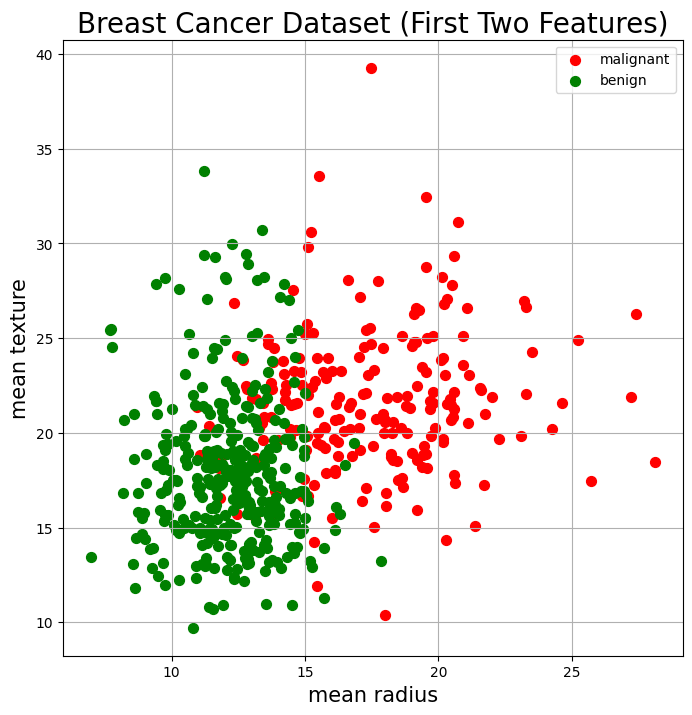

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
breast_cancer = load_breast_cancer()

# Convert the dataset to a Pandas DataFrame
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)

# Add the target column to the DataFrame
df['target'] = breast_cancer.target
df['target_names'] = breast_cancer.target_names[df['target']]

# Plotting
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel(breast_cancer.feature_names[0], fontsize=15)
ax.set_ylabel(breast_cancer.feature_names[1], fontsize=15)
ax.set_title('Breast Cancer Dataset (First Two Features)', fontsize=20)

# Plot points with different colors for different classes
targets = ['malignant', 'benign']
colors = ['r', 'g']

for target, color in zip(targets, colors):
    indicesToKeep = df['target_names'] == target
    ax.scatter(df.loc[indicesToKeep, breast_cancer.feature_names[0]],
               df.loc[indicesToKeep, breast_cancer.feature_names[1]],
               c=color, s=50)

ax.legend(targets)
ax.grid()

plt.show()


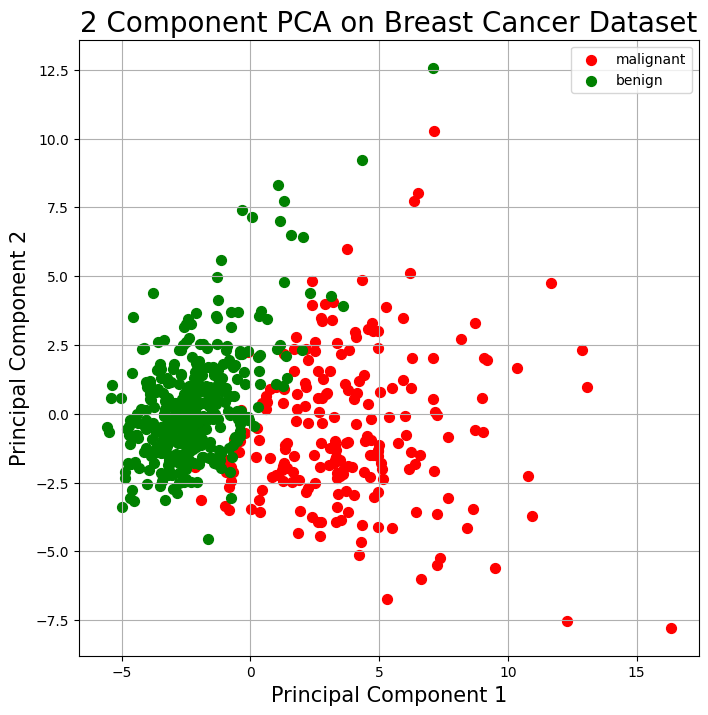

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the breast cancer dataset
breast_cancer = load_breast_cancer()

# Convert the dataset to a Pandas DataFrame
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)

# Add the target column to the DataFrame
df['target'] = breast_cancer.target
df['target_names'] = breast_cancer.target_names[df['target']]

# Standardizing the features
features = breast_cancer.feature_names
x = StandardScaler().fit_transform(df.loc[:, features].values)

# PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target_names']]], axis=1)

# Plotting
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 Component PCA on Breast Cancer Dataset', fontsize=20)

# Plot points with different colors for different classes
targets = ['malignant', 'benign']
colors = ['r', 'g']

for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target_names'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c=color, s=50)

ax.legend(targets)
ax.grid()

plt.show()


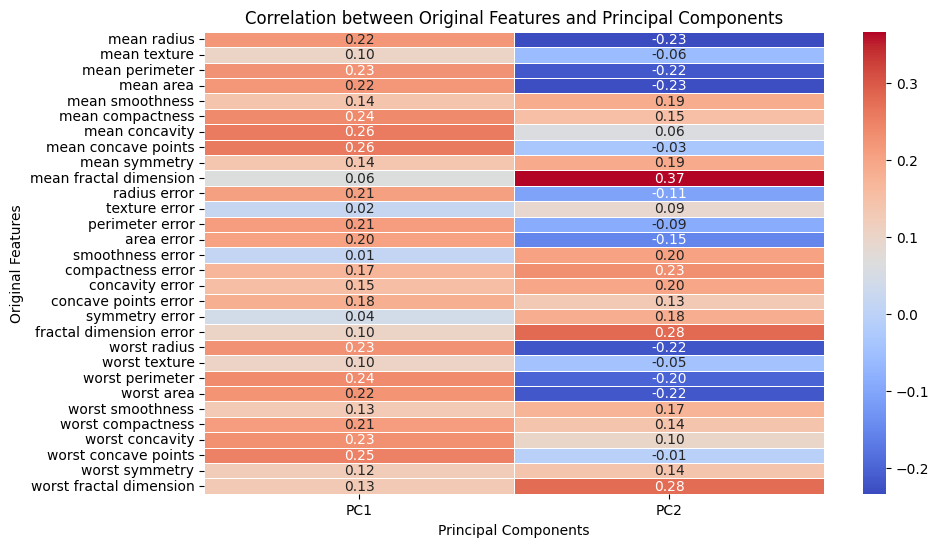

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the breast cancer dataset
breast_cancer = load_breast_cancer()

# Convert the dataset to a Pandas DataFrame
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)

# Add the target column to the DataFrame
df['target'] = breast_cancer.target
df['target_names'] = breast_cancer.target_names[df['target']]

# Standardizing the features
features = breast_cancer.feature_names
x = StandardScaler().fit_transform(df.loc[:, features].values)

# PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

# Create a DataFrame for principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Concatenate the principal components DataFrame with the target
finalDf = pd.concat([principalDf, df[['target_names']]], axis=1)

# Calculate the correlation matrix between original features and principal components
correlation_matrix = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=features)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation between Original Features and Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()


## Results of PCA Analysis on Breast Cancer Dataset

### 1. Scatter Plot of Dataset with First 2 Features

When initially plotting the breast cancer dataset using only the first two features, it was observed that some malignant and benign data points were overlapping. This suggests that the two classes may not be easily separable based on these two features alone.

### 2. PCA with 2 Components

After applying PCA with 2 components to the breast cancer dataset, a significant improvement in the visualization was observed. An obvious boundary appeared, making it easier to distinguish between the two different classes (malignant and benign). This indicates that the PCA transformation effectively reduced the dimensionality of the data while preserving important information, allowing for better separation between classes.

### 3. Heatmap of Feature Importance in PCA Components

To further understand the impact of each feature on the first two principal components, a heatmap was generated. The heatmap revealed which features had the most significant influence on the PCA components. Features with higher weights in the PCA components contribute more to the variance explained by those components. This information can be valuable for feature selection and understanding the underlying structure of the dataset.

Overall, the PCA analysis provided insights into the structure of the breast cancer dataset, allowing for improved visualization and classification of the data.
